# Laboratorio 2: Condicionamiento
## Cálculo del número de condición de una matriz

In [2]:
import numpy as np
### numero de condicion ######
from numpy import linalg as LA
a = np.array([[1, 0, -1], [0, 1, 0], [1, 0, 1]])
print(a)
print("cond(a)={0}".format(LA.cond(a)))
print("cond(a,'fro')={0}".format(LA.cond(a, 'fro')))

[[ 1  0 -1]
 [ 0  1  0]
 [ 1  0  1]]
cond(a)=1.4142135623730951
cond(a,'fro')=3.1622776601683795


## Matriz mal condicionada 

In [4]:
a = np.array([[1, -.01], [2, .01]])
print("cond(a)={0}".format(LA.cond(a)))
#### queremos resolver ax=y
####                   (a+da)x=y
y = np.array([2,1]).reshape((2, 1))
da= np.array([[0, 0], [0, .005]])
x0 = np.linalg.solve(a, y)
x1 = np.linalg.solve(a+da, y)

print("Solucion inicial ={0} ".format(x0.reshape(2,)))

print("Solucion perturbada ={0} ".format(x1.reshape(2,)))



cond(a)=166.6673333573341
Solucion inicial =[   1. -100.] 
Solucion perturbada =[  1.14285714 -85.71428571] 


## Número de condición de una función

In [ ]:
### numero de condicion de una funcion######
w_roots=np.arange(1,21)
W=np.poly(w_roots)
perturb=np.zeros_like(W)
perturb[1]=1e-7
W_perturb = W + perturb
perturbed_roots=np.roots(W_perturb)
w_roots = np.sort(w_roots)
perturbed_roots = np.sort(perturbed_roots)
print((LA.norm(perturbed_roots-w_roots)/
    LA.norm(perturb)))
######################################################
# Esta directiva habilita los graficos en notebook 
%matplotlib inline
######################################################
import matplotlib.pyplot as plt
plt.plot(w_roots,np.zeros_like(w_roots),'o')
plt.plot(perturbed_roots.real,perturbed_roots.imag,'*')
plt.show()

## Cancelacion catastrofica

In [5]:
a=np.sqrt(1+1e20)
b=np.sqrt(1e20)

In [6]:
print(a-b)

0.0


In [7]:
print(1/(a+b))

5e-11


## Estabilidad de algoritmos

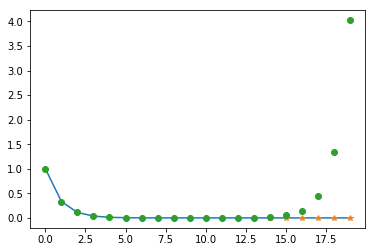

In [9]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
n=20
r=np.zeros(shape=(n,),dtype='f')
p=np.zeros_like(r)
q=np.zeros_like(p)
r[0]=p[0]=q[0]=1
r[1]=p[1]=q[1]=1/3
for i in range(1,n-1):
    r[i+1]=(1/3)*r[i]
    p[i+1]=(4/3)*p[i]-(1/3)*p[i-1]
    q[i+1]=(10/3)*q[i]-q[i-1]
    
plt.plot(range(n), r, '-')
plt.plot(range(n), p, '*')
plt.plot(range(n), q, 'o')
plt.show()